In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def get_sum(lambd_p: int, lambd_e: float):
    n = np.random.poisson(lambd_p)
    X = np.random.exponential(lambd_e, (n, 1))

    return np.sum(X)

In [3]:
def simulate(lambd_p: int, lambd_e: float, num_sims: int = 100_000):
    n = np.random.poisson(lambd_p, (num_sims))
    N = np.max(n)

    X = np.random.exponential(lambd_e, (N, num_sims))

    mask = np.ones((N, num_sims))

    for i in range(num_sims):
        mask[n[i] : N, i] = 0

    X *= mask

    results = np.sum(X, axis=0)


    return np.array(results)

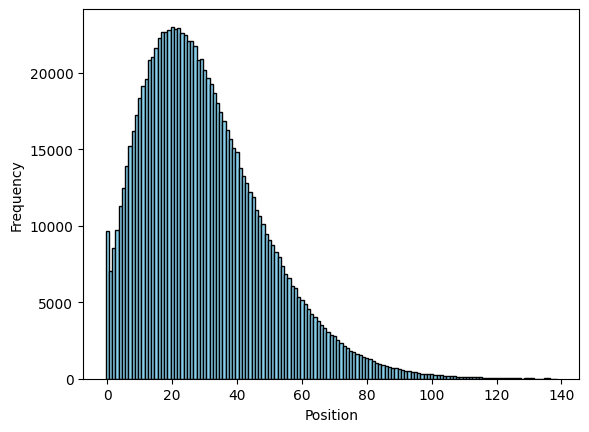

30.003699482067155

In [4]:
res = simulate(5, 6, 100_000_0)

plt.hist(res, color="skyblue", edgecolor="black", bins = [i - 0.5 for i  in range(140)])

# Adding labels and title
plt.xlabel("Position")
plt.ylabel("Frequency")

# Display the plot
plt.show()

np.mean(res)

In [5]:
def simulate_statistic(lambd_p: int, lambd_e: float, num_sims: int = 10_000, num_means: int = 1000):
    means = []
    stds = []

    for _ in tqdm(range(num_means)):
        stats = simulate(lambd_p, lambd_e, num_sims)
        means.append(np.mean(stats))
        stds.append(np.std(stats))

    return np.array(means), np.array(stds)

In [6]:
means, stds = simulate_statistic(5, 6, 10_000, 10_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:07<00:00, 148.44it/s]


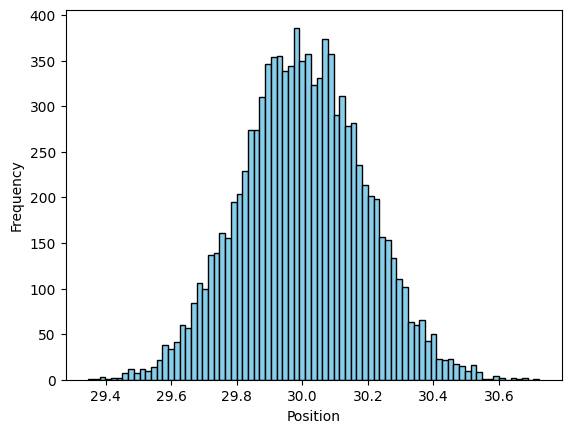

30.00229072688065

In [7]:
bins = np.linspace(np.min(means), np.max(means), 80)

plt.hist(means, color="skyblue", edgecolor="black", bins = bins)

# Adding labels and title
plt.xlabel("Position")
plt.ylabel("Frequency")

# Display the plot
plt.show()

np.mean(means)

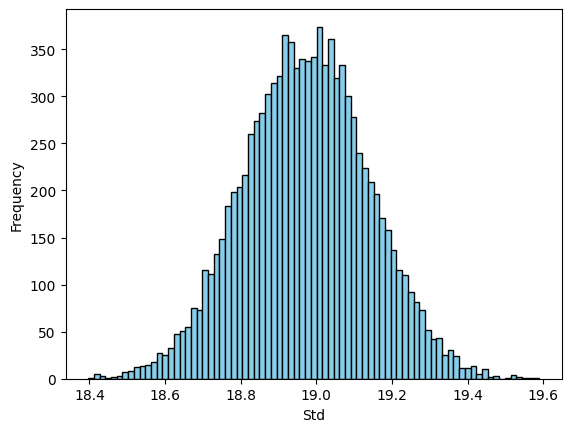

18.972649329119722

In [8]:
bins = np.linspace(np.min(stds), np.max(stds), 80)

plt.hist(stds, color="skyblue", edgecolor="black", bins = bins)

# Adding labels and title
plt.xlabel("Std")
plt.ylabel("Frequency")

# Display the plot
plt.show()

np.mean(stds)